In [3]:
import ipdb
MFC = {}

def hash_fft_coeff(e):    
    if e in MFC:
        return MFC[e]
    else:
        return 1

def amplify(array_data):
    result = np.zeros(array_data.shape[0])
    s = np.fft.fft(array_data)

    for i, e in enumerate(f_d):
        result[i] = hash_fft_coeff(e)
    
    return result

In [4]:
import pyaudio as pa
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display

%matplotlib inline

CHUNK = 128
FORMAT = pa.paInt16
CHANNELS = 1
RATE = 44100

# print(CHUNK / RATE)

papa = pa.PyAudio()

stream = papa.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, output=True, frames_per_buffer=CHUNK)

print("* recording")

g = []

while True:
    data = stream.read(CHUNK)
    array_data = np.fromstring(data, np.int16)

    amplified_signal = amplify(array_data)

    result = -1 * amplified_signal
    
    stream.write(result.tobytes())
    
print("* done recording")

* recording
> <ipython-input-3-516fe4f2e51b>(19)build_coeff()
     18 
---> 19     j += 1
     20 

ipdb> о
*** NameError: name 'о' is not defined
ipdb> j
*** The 'jump' command requires a line number
ipdb> f_d
array([  8.59900000e+03 +0.00000000e+00j,
         8.02759120e+02 -3.05968939e+03j,
        -9.10259087e+02 +4.37553239e+02j,
        -7.96396908e+02 +8.18930259e+01j,
        -1.01159214e+03 -7.99845306e+02j,
        -1.07248643e+03 +5.60663827e+02j,
        -4.77691874e+02 +1.64016362e+02j,
         3.41529586e+03 +1.74002516e+03j,
        -1.26315757e+02 +5.30101859e+01j,
        -5.85039509e+02 -1.86777416e+03j,
        -2.73764708e+01 -7.16329824e+02j,
         2.10409533e+03 -2.13474673e+03j,
         1.93880156e+03 +1.80596491e+03j,
         2.18264889e+03 -1.03069344e+03j,
        -1.25990222e+03 +1.76785440e+03j,
        -4.39450879e+02 +7.16756421e+01j,
        -9.54907250e+02 -5.79738636e+02j,
         2.04321914e+00 -1.68181055e+01j,
        -2.14980648e+02 -2.003640

OSError: [Errno Input overflowed] -9981

In [ ]:
import pyaudio
import wave
import time
import numpy as np
CHUNK_SIZE = 5
FORMAT = pyaudio.paInt16
RATE = 44100

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=1, rate=RATE,
input=True, output=True,
frames_per_buffer=CHUNK_SIZE)
print(stream.get_input_latency(), stream.get_output_latency())
p.terminate()

In [ ]:
plt.plot(array_data)
plt.plot(result)
plt.plot(result + array_data)

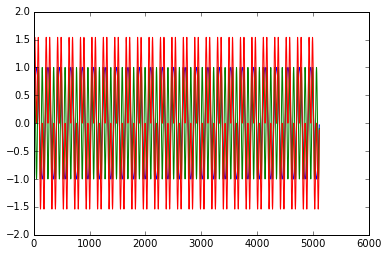

In [27]:
i = np.arange(1, 10240 / 2)
g1 = np.sin(2 * np.pi * 5 * i / 1024)
g2 = np.sin(2 * np.pi * 15 * i / 1024)
plt.plot(g1)
plt.plot(g2)
plt.plot(g1 + g2)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


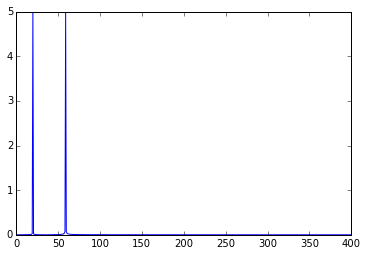

In [28]:
yf = np.fft.fft(g1 + g2)
dt = 1.0 / 800.0
xf = np.linspace(0.0, 1.0/(2.0*dt), 1024/2)
plt.plot(xf, 2.0/1024 * np.abs(yf[0:1024/2]))